Q1. Use the “ToothGrowth” dataset from Pydataset. 

1a. Ask Python to show you the documentation for this dataset. Based on the documentation, which variable(s) can serve as the grouping variable(s)? How many groups are there? 



1b. Do descriptive analysis by delivery methods. Produce a boxplot, and a table of summary statistics. 



1c. Do descriptive analysis by dose levels. Produce a boxplot, and a table of summary statistics. 

1d. What conclusion can you get?

ToothGrowth

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## The Effect of Vitamin C on Tooth Growth in Guinea Pigs

### Description

The response is the length of odontoblasts (teeth) in each of 10 guinea pigs
at each of three dose levels of Vitamin C (0.5, 1, and 2 mg) with each of two
delivery methods (orange juice or ascorbic acid).

### Usage

    ToothGrowth

### Format

A data frame with 60 observations on 3 variables.

[,1]

len

numeric

Tooth length

[,2]

supp

factor

Supplement type (VC or OJ).

[,3]

dose

numeric

Dose in milligrams.

### Source

C. I. Bliss (1952) _The Statistics of Bioassay_. Academic Press.

### References

McNeil, D. R. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(graphics)
    coplot(len ~ dose | supp, data = ToothGrowth, panel = panel.smooth,
           xlab = "ToothGrowth data: length vs dose, given type of supplement")


None
      count       mean       std  min     2

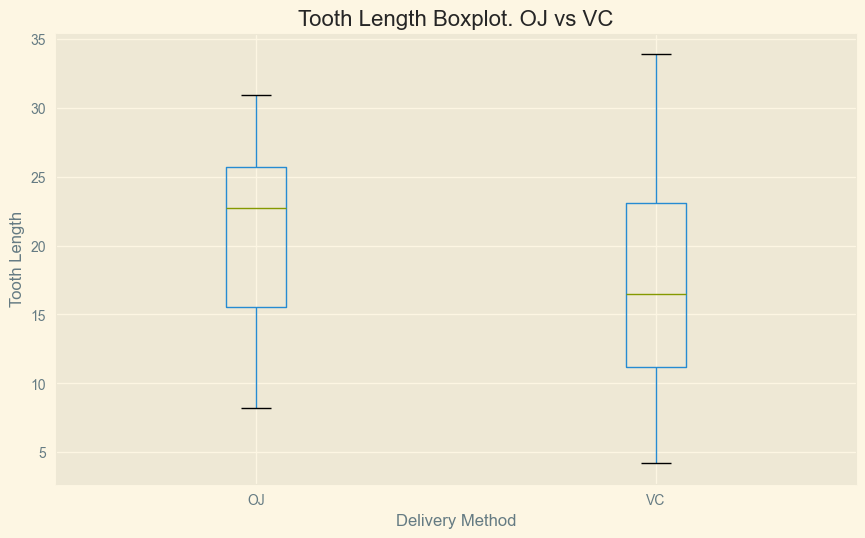

      count    mean       std   min     25%    50%     75%   max
dose                                                            
0.5    20.0  10.605  4.499763   4.2   7.225   9.85  12.250  21.5
1.0    20.0  19.735  4.415436  13.6  16.250  19.25  23.375  27.3
2.0    20.0  26.100  3.774150  18.5  23.525  25.95  27.825  33.9


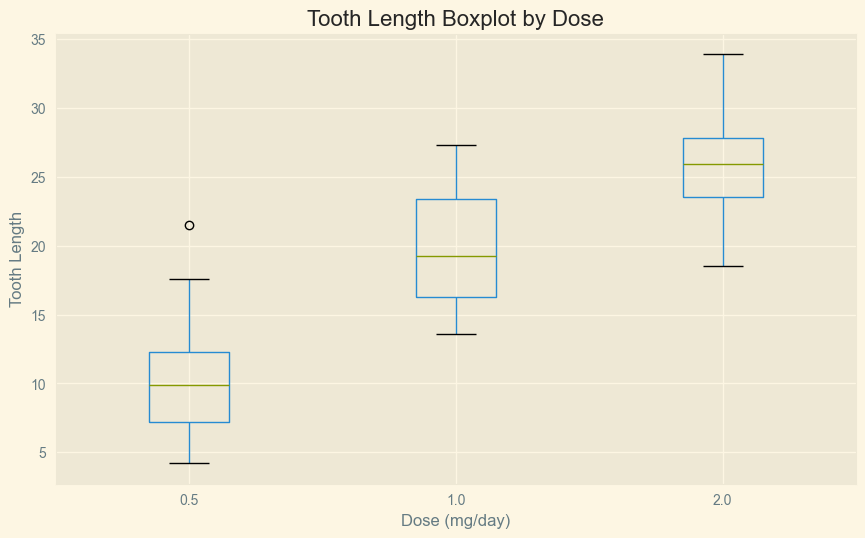

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

plt.style.use('Solarize_Light2') # I like this style from M10
plt.rcParams['figure.figsize'] = (10, 6) # Setting default size for charts. I did it manually for each one in M10

# Load the ToothGrowth dataset
df = data('ToothGrowth')

# Q1A
print(data('ToothGrowth', show_doc=True))
'''
The ToothGrowth dataset contains the following columns:
- len: Tooth length
- supp: Supplement type (VC or OJ)
- dose: Dose in milligrams 

We can use the Supp and Dose as Grouping variables
'''

# Q1B

# Stat Summary
print(df.groupby('supp')['len'].describe())

# Boxplot
df.boxplot(column='len', by='supp')
plt.title('Tooth Length Boxplot. OJ vs VC')
plt.suptitle('')
plt.xlabel('Delivery Method')
plt.ylabel('Tooth Length')
plt.show()

# Q1C

# Stat Summary
print(df.groupby('dose')['len'].describe())

# Boxplot
df.boxplot(column='len', by='dose')
plt.title('Tooth Length Boxplot by Dose')
plt.suptitle('')
plt.xlabel('Dose (mg/day)')
plt.ylabel('Tooth Length')
plt.show()

1d. What conclusion can you get?

 Based on the boxplots and summary statistics, both the delivery method and dose levels have effects on tooth growth. OJ delivery appears to result in higher tooth growth compared to VC, and higher doses lead to increased tooth growth. 

Q2. Use the “pressure” dataset from Pydataset.

1a. Read the dataset’s documentation to understand what it is about. Use an appropriate plot to
visualize this data.

1b. Calculation the correlation coefficient of pressure vs temperature.

1c. Run a simple linear regression. Which variable should be X, and which should be Y? Why? After
fitting the regression line, show the result together with a scatter plot.

1d. Based on your regression results, what would the pressure be when the temperature is -20?


pressure

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Vapor Pressure of Mercury as a Function of Temperature

### Description

Data on the relation between temperature in degrees Celsius and vapor pressure
of mercury in millimeters (of mercury).

### Usage

    pressure

### Format

A data frame with 19 observations on 2 variables.

[, 1]

temperature

numeric

temperature (deg C)

[, 2]

pressure

numeric

pressure (mm)

### Source

Weast, R. C., ed. (1973) _Handbook of Chemistry and Physics_. CRC Press.

### References

McNeil, D. R. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(graphics)
    plot(pressure, xlab = "Temperature (deg C)",
         ylab = "Pressure (mm of Hg)",
         main = "pressure data: Vapor Pressure of Mercury")
    plot(pressure, xlab = "Temperature (deg C)",  log = "y",
         ylab = "Pressure (mm of Hg)",
         main = "pressure data: Vapor Pressure of Mercury")


None


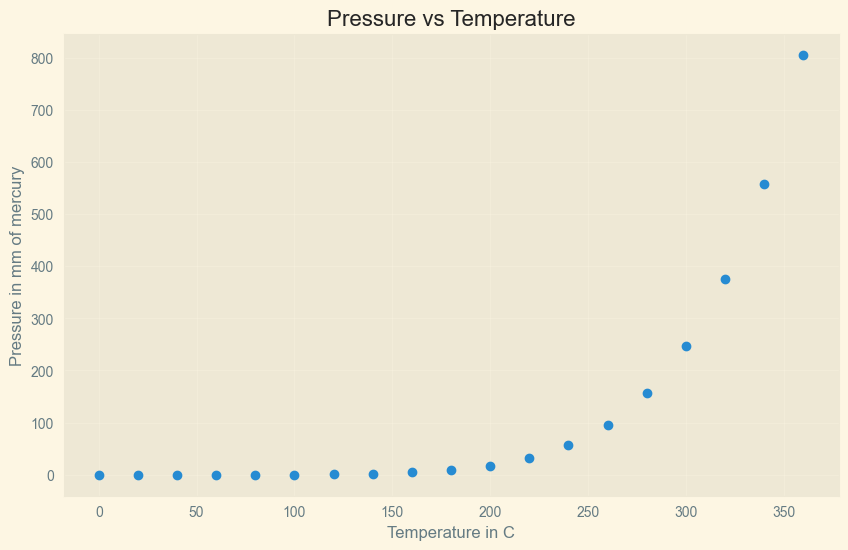

Correlation coefficient: 0.76
         names        coef         se         T      pval        r2    adj_r2  \
0    Intercept -147.898873  66.552888 -2.222276  0.040124  0.574249  0.549205   
1  temperature    1.512420   0.315846  4.788472  0.000171  0.574249  0.549205   

     CI[2.5%]  CI[97.5%]  
0 -288.313192  -7.484553  
1    0.846043   2.178797  

Equation: Y = 1.51X + -147.90


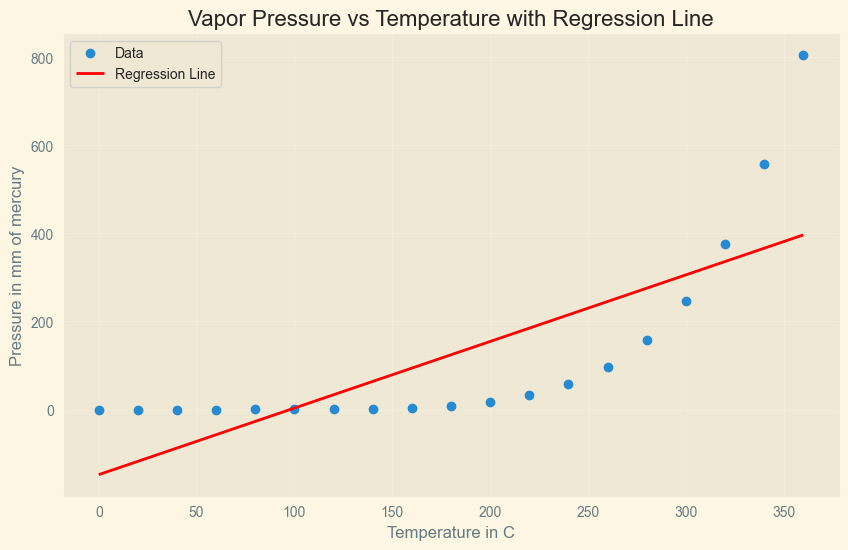

Predicted pressure at -20°C: -178.15 mm of Hg


'\nBased on the Regression Line 20C would be around ~-180 mm of mercury\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
# !python -m pip install pingouin
import pingouin as pg


plt.style.use('Solarize_Light2') # I like this style from M10
plt.rcParams['figure.figsize'] = (10, 6) # Setting default size for charts. I did it manually for each one in M10

# Dataset
df = data('pressure')

# Q2A
print(data('pressure', show_doc=True))
'''
The Pressure dataset contains the following columns:
- temperature: Temperature in degrees Celsius
- pressure: Vapor pressure in mm of mercury
'''

# Scatter Plot
plt.scatter(df['temperature'], df['pressure'])
plt.title('Pressure vs Temperature')
plt.xlabel('Temperature in C')
plt.ylabel('Pressure in mm of mercury')
plt.grid(True, alpha=0.3)
plt.show()

# Q2B
correlation = df['temperature'].corr(df['pressure'])
print(f"Correlation coefficient: {correlation:.2f}")

# Q2C
# Temp affects pressure. Temp is independent variable (X), Pressure is dependent variable (Y)

# Fit regression
results = pg.linear_regression(df[['temperature']], df['pressure'])
print(results)

# Coefficients
slope = results['coef'][1]
intercept = results['coef'][0]

print(f"\nEquation: Y = {slope:.2f}X + {intercept:.2f}")

# Plot with regression line
plt.scatter(df['temperature'], df['pressure'], label='Data')
regression_line = slope * df['temperature'] + intercept
plt.plot(df['temperature'], regression_line, color='red', label='Regression Line')
plt.title('Vapor Pressure vs Temperature with Regression Line')
plt.xlabel('Temperature in C')
plt.ylabel('Pressure in mm of mercury')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Q2D
temp = -20
predicted = slope * temp + intercept
print(f"Predicted pressure at -20C: {predicted:.2f} mm of Hg")

'''
Based on the Regression Line 20C would be around ~-180 mm of mercury
'''